Taller 4 - métodos computacionales 2

Silvana Archila y Catalina Fuentes

1. Ecuación de Poisson en un disco

c:\Users\Catalina Fuentes\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 120601 (\N{MATHEMATICAL ITALIC PHI SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


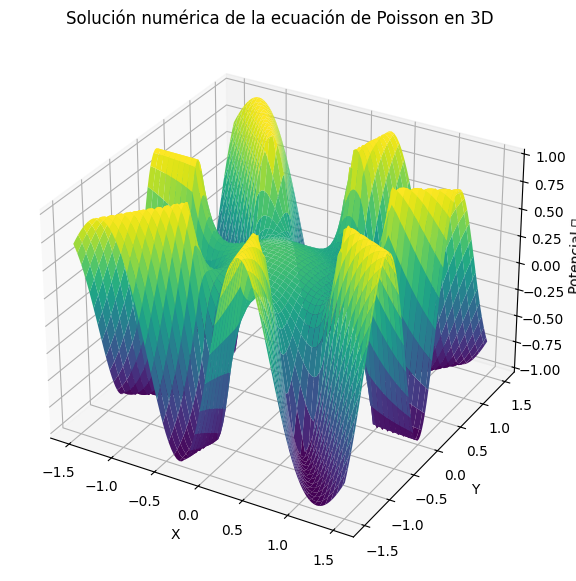

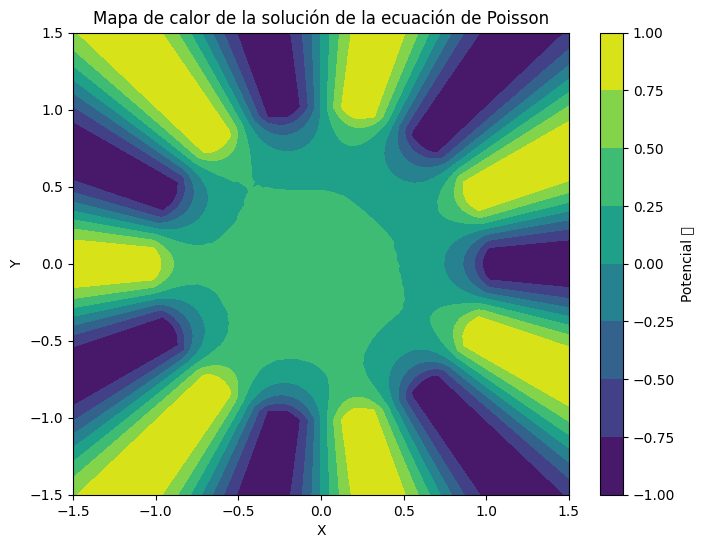

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Defino parámetros
N = 100
delta = (1/(N))**2  #espaciado entre puntos al cuadrado
x = np.linspace(-1.5, 1.5, N)
y = np.linspace(-1.5, 1.5, N)
convergencia = 10**(-4)

phi = np.zeros((N, N))
phi_new = np.zeros((N, N))

#Pongo condiciones iniciales
for i in range(N):
    for j in range(N):
        if x[i]**2 + y[j]**2 > 1:  
            phi[i, j] = np.sin(7 * np.arctan2(y[j], x[i]))  #condición de frontera
        else:
            phi[i, j] = np.random.random()  
            
#Resuelvo ecuación diferencial
for t in range(500):  
    for i in range(1, N-1):  #ojo, evitar bordes
        for j in range(1, N-1):
            if x[i]**2 + y[j]**2 < 1:  #solo actualizar dentro del círculo
                rho = -x[i] - y[j]
                phi_new[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + 4* delta * np.pi  * rho) / 4

    #Aplicar condicion de frontera otra vez
    for i in range(N):
        for j in range(N):
            if x[i]**2 + y[j]**2 > 1: 
                phi_new[i, j] = np.sin(7 * np.arctan2(y[j], x[i]))

    #Criterio de convergencia
    if np.max(np.abs(phi_new - phi)) < convergencia:
        break

    # Actualizo phi
    phi = phi_new.copy()

#Grafica 3D
X, Y = np.meshgrid(x, y)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, phi_new, cmap='viridis')
ax.set_title('Solución numérica de la ecuación de Poisson en 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Potencial 𝜙')
plt.show()

#Grafica 2D 
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, phi_new, cmap='viridis')
plt.colorbar(label='Potencial 𝜙')
plt.title('Mapa de calor de la solución de la ecuación de Poisson')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

2. Ecuación de onda unidimensional

MovieWriter imagemagick unavailable; using Pillow instead.


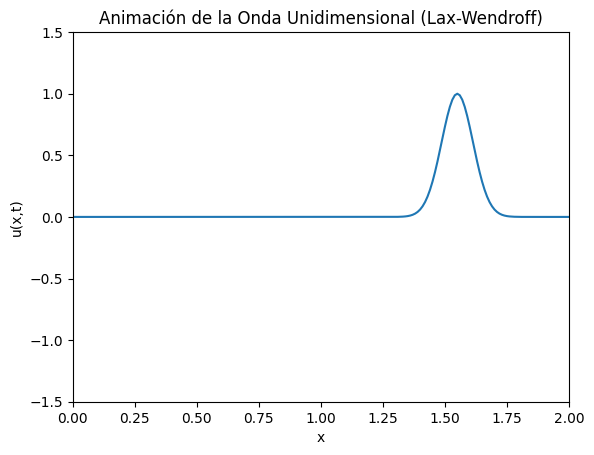

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros
x_max = 2.0  # Longitud del dominio
t_max = 5.0  # Tiempo total de simulación
c = 0.5  # Velocidad de la onda
N = 200  # Número de puntos en el espacio
dx = x_max / N  # Tamaño del paso espacial
dt = 0.02  # Tamaño del paso temporal (para estabilidad)
nx = int(x_max / dx) + 1
nt = int(t_max / dt) + 1

# Condiciones iniciales
x = np.linspace(0, x_max, nx)
u = np.zeros(nx)      # u en el tiempo actual
u_new = np.zeros(nx)  # u en el tiempo siguiente

# Desplazamiento inicial
for i in range(nx):
    u[i] = np.exp(-125 * ((x[i] - 1.0) ** 2))

# Configuración de la animación
fig, ax = plt.subplots()
line, = ax.plot(x, u)

ax.set_xlim(0, x_max)
ax.set_ylim(-1.5, 1.5)
ax.set_xlabel('x')
ax.set_ylabel('u(x,t)')
ax.set_title('Animación Onda 1D (Periódica)')

# Función de actualización para la animación
def update(frame):
    global u, u_new

    # Actualizar los valores de u_new usando el esquema Lax-Wendroff
    for i in range(1, nx - 1):
        # Implementación del esquema Lax-Wendroff
        u_new[i] = u[i] - 0.5 * (c * dt / dx) * (u[i + 1] - u[i - 1]) + \
                   0.5 * (c * dt / dx) ** 2 * (u[i + 1] - 2 * u[i] + u[i - 1])

    # Condiciones de frontera periódicas
    u_new[0] = u_new[-2]
    u_new[-1] = u_new[1]

    # Avanzar al siguiente estado
    u[:] = u_new[:]

    # Actualizar la línea de la animación
    line.set_ydata(u)  # Actualizar los datos de la onda
    return line,

# Crear la animación
ani = FuncAnimation(fig, update, frames=nt, blit=True, interval=20)

# Guardar la animación como archivo MP4
ani.save('2.3.simulacion_onda_1D_periodico.gif', writer='imagemagick')

# Mostrar la animación (opcional)
plt.show()

Text(0.5, 1.0, 'Ecuación de Onda 1D')

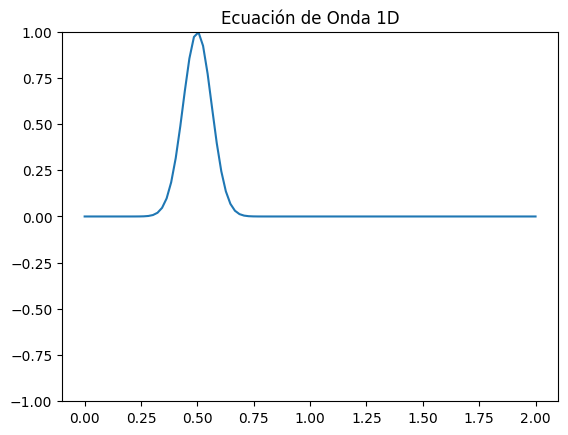

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Parámetros
L = 2  
c = 1  
Nx = 100  
dx = L / (Nx - 1) 
dt = 0.01  
Nt = 500  
C = c * dt / dx  # Coeficiente de Courant

# Espacio y tiempo
x = np.linspace(0, L, Nx)
u = np.exp(-125 * (x - 0.5)**2)  
u_old = np.copy(u) 
u_new = np.zeros_like(u)  

# Configuración de la animación
fig, ax = plt.subplots()
line, = ax.plot(x, u)
ax.set_ylim(-1, 1)
ax.set_title('Ecuación de Onda 1D')

def update_dirichlet(frame):
    global u, u_old, u_new
    u_new[1:-1] = 2*u[1:-1] - u_old[1:-1] + C**2 * (u[2:] - 2*u[1:-1] + u[:-2])
    u_new[0] = 0  # Condición de frontera Dirichlet en x=0
    u_new[-1] = 0  # Condición de frontera Dirichlet en x=L
    u_old, u = u, u_new
    line.set_ydata(u)
    return line,

# Animación Dirichlet
ani = FuncAnimation(fig, update_dirichlet, frames=Nt, interval=20)
ani.save('2.1.simulacion_onda_1D_dirichlet.gif', writer='imagemagick')
plt.show()

#ESTE ESTA MAL


In [ ]:
#FALTA NEUMANN Y CORREGIR DIRICHLET

3. aaa

4. Ecuación de onda bidimensional

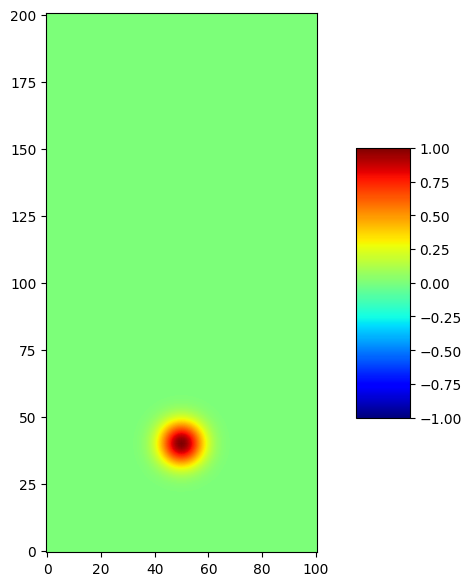

In [25]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Parámetros
dx = 0.01  
dy = 0.01  
dt = 0.01 
c = 0.5  
tmax = 3.0 
xmax = 2.0  
ymax = 1.0  

#Número de celdas
nx = int(xmax/dx) + 1
ny = int(ymax/dy) + 1 
nt = int(tmax/dt) + 1

#Variables
x = np.linspace(0, xmax, nx)
y = np.linspace(0, ymax, ny)
u = np.zeros((nx, ny))  # u actual
u_new = np.zeros((nx, ny))  # u futuro
u_old = np.zeros((nx, ny))  # u pasado

# Condición inicial: gaussiana
for i in range(nx):
    for j in range(ny):
        u[i, j] = np.exp(-150 * ((x[i] - 0.4)**2 + (y[j] - 0.5)**2))

# Función para aplicar las condiciones de frontera de Dirichlet
def condiciones_frontera_dirichlet(u):
    u[0, :] = 0  # x=0
    u[-1, :] = 0  # x=xmax
    u[:, 0] = 0  # y=0
    u[:, -1] = 0  # y=ymax
    
    # Pared
    for i in range(nx):
        for j in range(ny):
            if (0 < y[j] < 0.42) and (0.99 < x[i] < 1.01):
                u[i, j] = 0
            if (0.58 < y[j] < 1) and (0.99 < x[i] < 1.01):
                u[i, j] = 0

    return u

# Función para aplicar las condiciones de frontera de Neumann
def condiciones_frontera_neumann(u):
    # Condiciones de Neumann en las partes horizontales y verticales
    u[0, :] = u[1, :]  # x=0, derivada en x = 0
    u[-1, :] = u[-2, :]  # x=xmax, derivada en x = 0
    u[:, 0] = u[:, 1]  # y=0, derivada en y = 0
    u[:, -1] = u[:, -2]  # y=ymax, derivada en y = 0
    
    # Pared
    for i in range(nx):
        for j in range(ny):
            if (0 < y[j] < 0.42) and (0.99 < x[i] < 1.01):
                u[i, j] = 0
            if (0.58 < y[j] < 1) and (0.99 < x[i] < 1.01):
                u[i, j] = 0

    return u

# Animación
X, Y = np.meshgrid(x, y)
fig, ax = plt.subplots(figsize=(10, 7))
cax = ax.imshow(u, interpolation='bilinear', cmap='jet', origin='lower', vmin=-1, vmax=1)
fig.colorbar(cax, ax=ax, shrink=0.5, aspect=5)



In [23]:
# Actualizar cada frame para Dirichlet
def update_plot_dirichlet(frame): 
    global u, u_new, u_old
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_new[i, j] = (2 * u[i, j] - u_old[i, j] +
                           (c * dt/dx) ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                           (c * dt/dy) ** 2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))

    u_old = u.copy()
    u = u_new.copy()
    
    condiciones_frontera_dirichlet(u)

    #actualizar gráfica
    cax.set_data(u)
    return cax,

#Animación para Dirichlet
ani_dirichlet = animation.FuncAnimation(fig, update_plot_dirichlet, frames=nt, interval=50, blit=True)
ani_dirichlet.save('4.1.simulacion_dirichlet.gif', writer='imagemagick')
plt.show()



MovieWriter imagemagick unavailable; using Pillow instead.


In [26]:
# Actualizar cada frame para Neumann
def update_plot_neumann(frame): 
    global u, u_new, u_old
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u_new[i, j] = (2 * u[i, j] - u_old[i, j] +
                           (c * dt/dx) ** 2 * (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                           (c * dt/dy) ** 2 * (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1]))

    u_old = u.copy()
    u = u_new.copy()
    
    condiciones_frontera_neumann(u)

    # actualizar gráfica
    cax.set_data(u)
    return cax,

# Animación para Neumann
ani_neumann = animation.FuncAnimation(fig, update_plot_neumann, frames=nt, interval=50, blit=True)
ani_neumann.save('4.2.simulacion_neumann.gif', writer='imagemagick')
plt.show()

#NO SE SI ESTO ESTA BIEN

MovieWriter imagemagick unavailable; using Pillow instead.
